# International Football Results from 1872 to 2024

### Student Name: Ratnica Mathew

### Student Number: 47735165

## Criteria 2: Data Storage

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, count, avg, max, min, sum
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Initialize Spark session
"""
spark = SparkSession.builder \
    .appName("Project") \
    .config("hdfs://namenode:9000") \
    .getOrCreate()
"""
spark = SparkSession.builder \
    .appName("Project") \
    .master("spark://spark-master:7077") \
    .getOrCreate()

In [3]:
# Load CSV files into DataFrames
goalscorers_df = spark.read.csv("hdfs://namenode:9000/goalscorers.csv", header=True, inferSchema=True)
results_df = spark.read.csv("hdfs://namenode:9000/results.csv", header=True, inferSchema=True)
shootouts_df = spark.read.csv("hdfs://namenode:9000/shootouts.csv", header=True, inferSchema=True)

# Display schema to ensure data is loaded correctly
goalscorers_df.printSchema()
results_df.printSchema()
shootouts_df.printSchema()

root
 |-- date: string (nullable = true)
 |-- home_team: string (nullable = true)
 |-- away_team: string (nullable = true)
 |-- team: string (nullable = true)
 |-- scorer: string (nullable = true)
 |-- minute: string (nullable = true)
 |-- own_goal: boolean (nullable = true)
 |-- penalty: boolean (nullable = true)

root
 |-- date: string (nullable = true)
 |-- home_team: string (nullable = true)
 |-- away_team: string (nullable = true)
 |-- home_score: integer (nullable = true)
 |-- away_score: integer (nullable = true)
 |-- tournament: string (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- neutral: boolean (nullable = true)

root
 |-- date: string (nullable = true)
 |-- home_team: string (nullable = true)
 |-- away_team: string (nullable = true)
 |-- winner: string (nullable = true)
 |-- first_shooter: string (nullable = true)



## Criteria 1: Data Size and Complexity

In [4]:
# Count and print the number of rows in each DataFrame
num_goalscorers = goalscorers_df.count()
num_results = results_df.count()
num_shootouts = shootouts_df.count()

print(f"Number of rows in Goalscorers DataFrame: {num_goalscorers}")
print(f"Number of rows in Results DataFrame: {num_results}")
print(f"Number of rows in Shootouts DataFrame: {num_shootouts}")

Number of rows in Goalscorers DataFrame: 44362
Number of rows in Results DataFrame: 47598
Number of rows in Shootouts DataFrame: 645


## Criteria 3.1: Data Exploration and Preprocessing

In [5]:
# Display missing data count in each DataFrame
print("Missing data in goalscorers_df:")
goalscorers_df.select([count(when(col(c).isNull(), c)).alias(c) for c in goalscorers_df.columns]).show()

print("Missing data in results_df:")
results_df.select([count(when(col(c).isNull(), c)).alias(c) for c in results_df.columns]).show()

print("Missing data in shootouts_df:")
shootouts_df.select([count(when(col(c).isNull(), c)).alias(c) for c in shootouts_df.columns]).show()

Missing data in goalscorers_df:
+----+---------+---------+----+------+------+--------+-------+
|date|home_team|away_team|team|scorer|minute|own_goal|penalty|
+----+---------+---------+----+------+------+--------+-------+
|   0|        0|        0|   0|     0|     0|       0|      0|
+----+---------+---------+----+------+------+--------+-------+

Missing data in results_df:
+----+---------+---------+----------+----------+----------+----+-------+-------+
|date|home_team|away_team|home_score|away_score|tournament|city|country|neutral|
+----+---------+---------+----------+----------+----------+----+-------+-------+
|   0|        0|        0|         0|         0|         0|   0|      0|      0|
+----+---------+---------+----------+----------+----------+----+-------+-------+

Missing data in shootouts_df:
+----+---------+---------+------+-------------+
|date|home_team|away_team|winner|first_shooter|
+----+---------+---------+------+-------------+
|   0|        0|        0|     0|          4

In [6]:
# Fill missing values in the 'first_shooter' column with "Unknown"
shootouts_df = shootouts_df.withColumn(
    "first_shooter", 
    when(col("first_shooter").isNull() | (col("first_shooter") == ""), "Unknown")
    .otherwise(col("first_shooter"))
)

# Show the DataFrame after filling missing values
print("DataFrame (after filling missing values):")
shootouts_df.show()

# Optionally, check how many entries were filled with "Unknown"
missing_count = shootouts_df.filter(col("first_shooter") == "Unknown").count()
print(f"Number of entries filled with 'Unknown': {missing_count}")

DataFrame (after filling missing values):
+----------+-----------+--------------------+----------------+-------------+
|      date|  home_team|           away_team|          winner|first_shooter|
+----------+-----------+--------------------+----------------+-------------+
|1967-08-22|      India|              Taiwan|          Taiwan|      Unknown|
|1971-11-14|South Korea|    Vietnam Republic|     South Korea|      Unknown|
|1972-05-07|South Korea|                Iraq|            Iraq|      Unknown|
|1972-05-17|   Thailand|         South Korea|     South Korea|      Unknown|
|1972-05-19|   Thailand|            Cambodia|        Thailand|      Unknown|
|1973-04-21|    Senegal|               Ghana|           Ghana|      Unknown|
|1973-06-14|     Guinea|                Mali|          Guinea|      Unknown|
|1973-06-14|  Mauritius|            Tanzania|       Mauritius|      Unknown|
|1973-07-26|   Malaysia|              Kuwait|        Malaysia|      Unknown|
|1973-07-26|   Cambodia|          

## Criteria 3.2: CRUD Operation

In [7]:
# Remove the 'neutral' column from the results DataFrame
results_df_updated = results_df.drop("neutral")

# Write the updated DataFrame back to HDFS
results_df_updated.write.csv("hdfs://namenode:9000/update_results.csv", header=True)

# Confirm the operation
results_df_updated.printSchema()
results_df_updated.show()

root
 |-- date: string (nullable = true)
 |-- home_team: string (nullable = true)
 |-- away_team: string (nullable = true)
 |-- home_score: integer (nullable = true)
 |-- away_score: integer (nullable = true)
 |-- tournament: string (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)

+----------+----------------+---------+----------+----------+----------+---------+--------+
|      date|       home_team|away_team|home_score|away_score|tournament|     city| country|
+----------+----------------+---------+----------+----------+----------+---------+--------+
|1872-11-30|        Scotland|  England|         0|         0|  Friendly|  Glasgow|Scotland|
|1873-03-08|         England| Scotland|         4|         2|  Friendly|   London| England|
|1874-03-07|        Scotland|  England|         2|         1|  Friendly|  Glasgow|Scotland|
|1875-03-06|         England| Scotland|         2|         2|  Friendly|   London| England|
|1876-03-04|        Scotland|

## Criteria 3.1 continued: Visualisations

In [8]:
# Convert Spark DataFrames to Pandas DataFrames for visualization
goalscorers_pd = goalscorers_df.toPandas()
results_pd = results_df_updated.toPandas()
shootouts_pd = shootouts_df.toPandas()

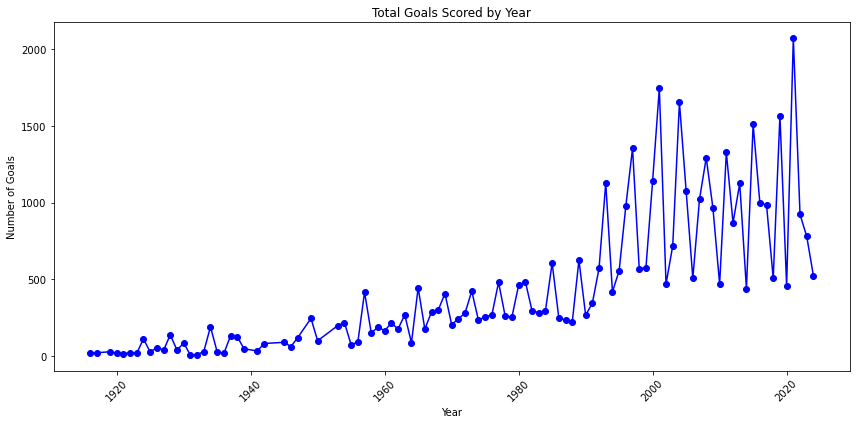

In [9]:
# Extract year from the date
goalscorers_pd['year'] = pd.to_datetime(goalscorers_pd['date']).dt.year

# Count total goals by year
goals_by_year = goalscorers_pd.groupby('year')['scorer'].count()

# Plot
plt.figure(figsize=(12, 6))
goals_by_year.plot(kind='line', marker='o', color='blue')
plt.title('Total Goals Scored by Year')
plt.xlabel('Year')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

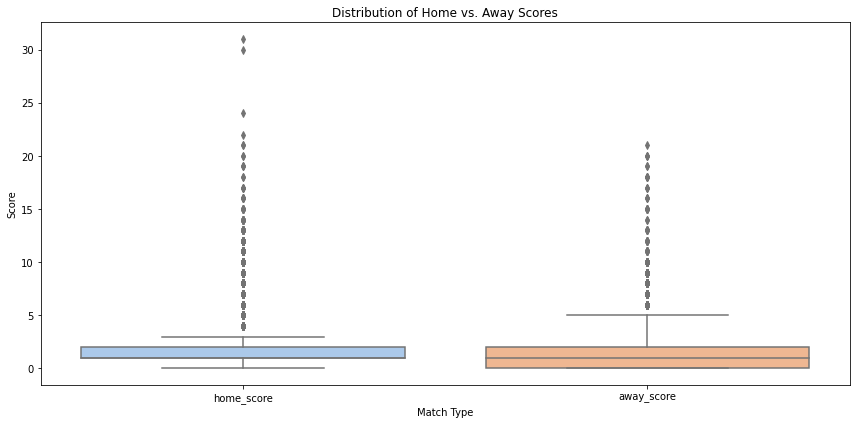

In [10]:
import seaborn as sns

# Combine home and away scores into one DataFrame
score_distribution = results_pd[['home_score', 'away_score']].melt(var_name='Match Type', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Match Type', y='Score', data=score_distribution, palette='pastel')
plt.title('Distribution of Home vs. Away Scores')
plt.xlabel('Match Type')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

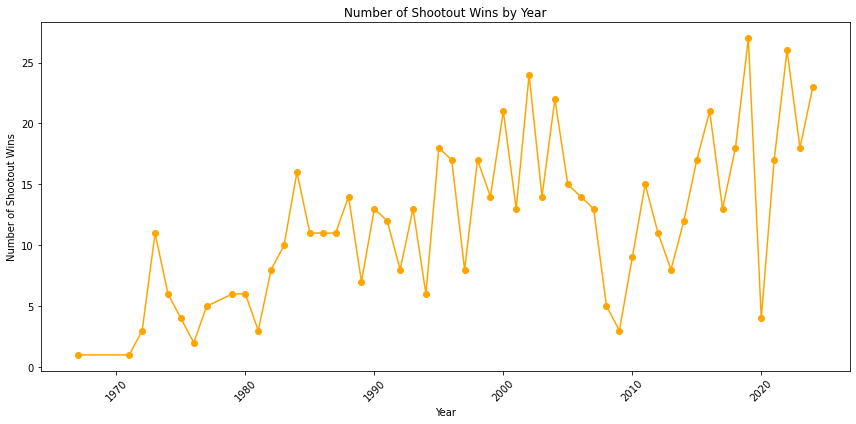

In [11]:
# Extract year from date
shootouts_pd['year'] = pd.to_datetime(shootouts_pd['date']).dt.year

# Count shootout wins by year
shootouts_by_year = shootouts_pd['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
shootouts_by_year.plot(kind='line', marker='o', color='orange')
plt.title('Number of Shootout Wins by Year')
plt.xlabel('Year')
plt.ylabel('Number of Shootout Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Criteria 4: Complex Big Data Queries w/ Views & Criteria 5: Visualisation

In [12]:
# Create views for SQL queries
goalscorers_df.createOrReplaceTempView("goalscorers")
results_df.createOrReplaceTempView("results")
shootouts_df.createOrReplaceTempView("shootouts")

### Query 1: The Top 10 Scorers and the Top 10 Scoring Teams

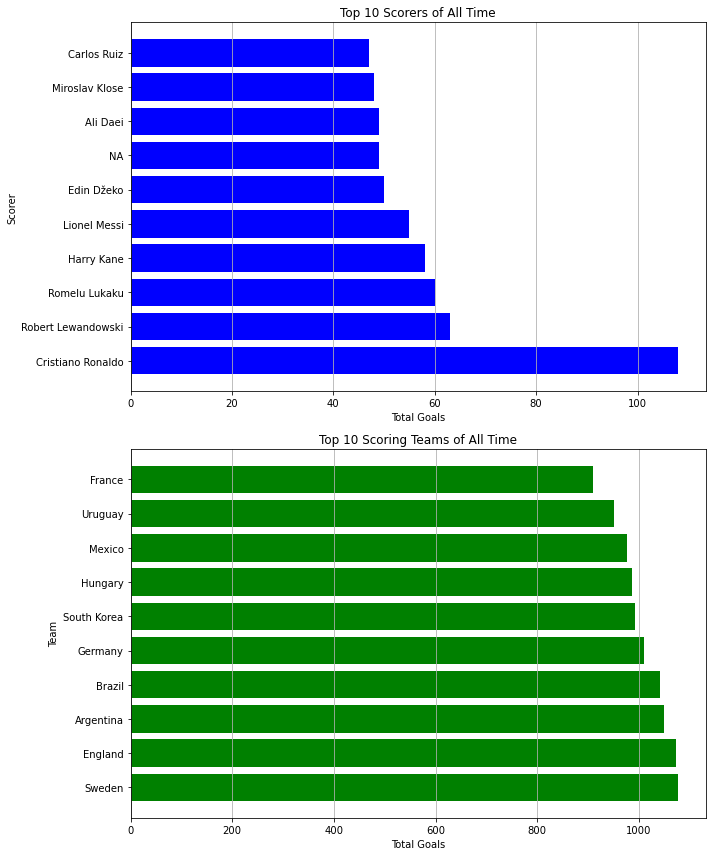

Top 10 Scorers:
               scorer  total_goals
0   Cristiano Ronaldo          108
1  Robert Lewandowski           63
2       Romelu Lukaku           60
3          Harry Kane           58
4        Lionel Messi           55
5          Edin Džeko           50
6                  NA           49
7            Ali Daei           49
8      Miroslav Klose           48
9         Carlos Ruiz           47

Top 10 Scoring Teams:
          team  total_goals
0       Sweden         1077
1      England         1072
2    Argentina         1049
3       Brazil         1042
4      Germany         1010
5  South Korea          992
6      Hungary          987
7       Mexico          977
8      Uruguay          950
9       France          910


In [13]:
# Top 10 Scorers and Top 10 Scoring Teams
query_top_scorers_and_teams = """
WITH top_scorers AS (
    SELECT 
        gs.scorer,
        COUNT(*) AS total_goals
    FROM goalscorers gs
    JOIN results r ON gs.date = r.date 
                    AND (gs.home_team = r.home_team OR gs.away_team = r.away_team)
    GROUP BY gs.scorer
    ORDER BY total_goals DESC
    LIMIT 10
),

top_teams AS (
    SELECT 
        home_team AS team,
        COUNT(*) AS total_goals
    FROM results
    GROUP BY home_team
    UNION ALL
    SELECT 
        away_team AS team,
        COUNT(*) AS total_goals
    FROM results
    GROUP BY away_team
)
SELECT 
    team,
    SUM(total_goals) AS total_goals
FROM top_teams
GROUP BY team
ORDER BY total_goals DESC
LIMIT 10;
"""

# Execute query
results_top_scorers_and_teams = spark.sql(query_top_scorers_and_teams)
results_top_scorers_and_teams_pd = results_top_scorers_and_teams.toPandas()

# Visualise
top_scorers_query = """
SELECT 
    gs.scorer,
    COUNT(*) AS total_goals
FROM goalscorers gs
JOIN results r ON gs.date = r.date 
                AND (gs.home_team = r.home_team OR gs.away_team = r.away_team)
GROUP BY gs.scorer
ORDER BY total_goals DESC
LIMIT 10;
"""

top_scorers_results = spark.sql(top_scorers_query)
top_scorers_pd = top_scorers_results.toPandas()

# Create plots
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Top 10 Scorers Bar Chart
ax[0].barh(top_scorers_pd['scorer'], top_scorers_pd['total_goals'], color='blue')
ax[0].set_xlabel('Total Goals')
ax[0].set_ylabel('Scorer')
ax[0].set_title('Top 10 Scorers of All Time')
ax[0].grid(axis='x')

# Top 10 Scoring Teams Bar Chart
ax[1].barh(results_top_scorers_and_teams_pd['team'], results_top_scorers_and_teams_pd['total_goals'], color='green')
ax[1].set_xlabel('Total Goals')
ax[1].set_ylabel('Team')
ax[1].set_title('Top 10 Scoring Teams of All Time')
ax[1].grid(axis='x')

plt.tight_layout()
plt.show()

# Display
print("Top 10 Scorers:")
print(top_scorers_pd)
print("\nTop 10 Scoring Teams:")
print(results_top_scorers_and_teams_pd)

The analysis of the top scorers and scoring teams in international football provides interesting insights into performance. Cristiano Ronaldo leads the individual rankings with 108 goals, while Robert Lewandowski and Romelu Lukaku follow with 63 and 60 goals, showing Ronaldo's impressive skills as a player. On the team side, Sweden has the most goals with 1077, closely followed by England at 1072, and other strong teams like Argentina, Brazil, and Germany have all scored over 1000 goals. This data helps highlight which teams are most competitive in matches. The bar chart makes it easy to compare the scores of different players and teams, giving a clear picture of who stands out. Knowing who the top performers are can really help coaches and analysts plan for upcoming games, making this information valuable in understanding the competitive landscape in international football.

### Query 2: Average Number of Goals per Year versus Average Number of Games per Year

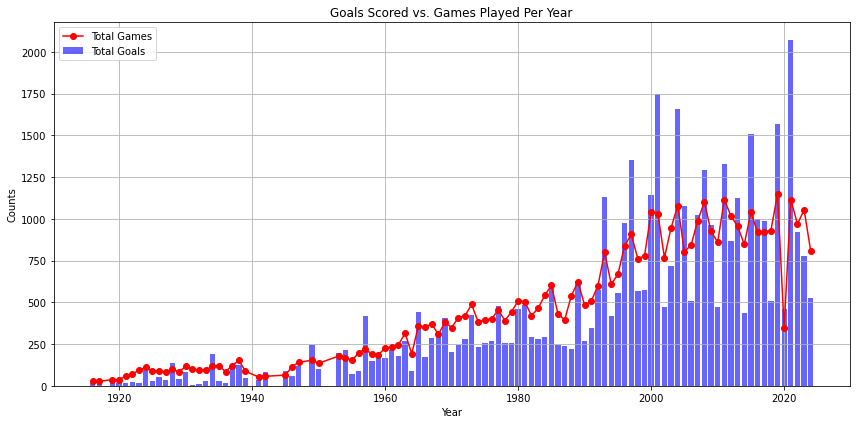

     year  total_goals  total_games
0    1916           18           29
1    1917           21           27
2    1919           27           37
3    1920           16           37
4    1921           14           59
..    ...          ...          ...
97   2020          459          347
98   2021         2073         1115
99   2022          923          969
100  2023          780         1054
101  2024          523          805

[102 rows x 3 columns]


In [14]:
# Goals Per Year and Games Per Year
query_goals_vs_games_per_year = """
WITH goals_per_year AS (
    SELECT 
        YEAR(date) AS year,
        COUNT(*) AS total_goals
    FROM goalscorers
    GROUP BY YEAR(date)
),
games_per_year AS (
    SELECT 
        YEAR(date) AS year,
        COUNT(*) AS total_games
    FROM results
    GROUP BY YEAR(date)
)
SELECT 
    g.year,
    g.total_goals,
    COALESCE(gg.total_games, 0) AS total_games
FROM goals_per_year g
LEFT JOIN games_per_year gg ON g.year = gg.year
ORDER BY g.year;
"""

# Execute query
results_goals_vs_games = spark.sql(query_goals_vs_games_per_year)
results_goals_vs_games_pd = results_goals_vs_games.toPandas()

# Visualise
plt.figure(figsize=(12, 6))

# Plot Goals per Year
plt.bar(results_goals_vs_games_pd['year'], results_goals_vs_games_pd['total_goals'], color='blue', label='Total Goals', alpha=0.6)

# Plot Games per Year
plt.plot(results_goals_vs_games_pd['year'], results_goals_vs_games_pd['total_games'], color='red', marker='o', label='Total Games')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Goals Scored vs. Games Played Per Year')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Display
print(results_goals_vs_games_pd)


Looking at the total goals and total games over the years, we see some interesting trends in football. For example, 2021 had a spike with 2073 goals in 1115 games, while in 1921, there were only 14 goals in 59 games. The chart shows that, although some years had a lot of goals, the total number of games usually outnumbers the goals. This suggests that not every match is high-scoring, which means teams might play more defensively at times. This mixed pattern is important because it helps coaches and analysts understand how different strategies can affect match results, which can help teams improve their scoring in future games.

### Query 3: The Distribution of Goals Scored per Valid Minute of a Game

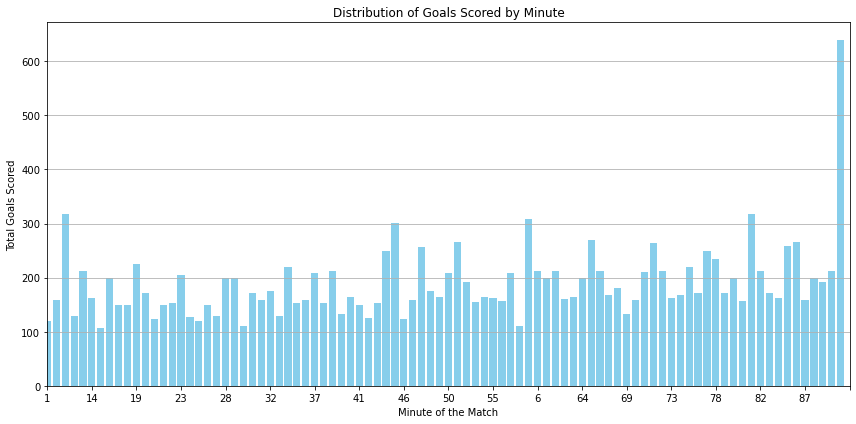

      minute  total_goals  match_date
0          1           40  2013-03-26
1          1            4  1974-03-06
2          1            3  2010-01-18
3          1            6  1985-11-17
4          1            4  2015-01-18
...      ...          ...         ...
37927     90          128  2023-06-20
37928     90            4  1999-07-24
37929     90          135  2009-02-11
37930     90           16  2014-09-09
37931     90           15  2018-10-14

[37932 rows x 3 columns]


In [15]:
# Distribution of goals scored per valid minute
query_goals_per_minute_with_join = """
SELECT 
    g.minute,
    COUNT(*) AS total_goals,
    r.date AS match_date
FROM 
    goalscorers g
JOIN 
    results r ON g.date = r.date
WHERE 
    g.minute IS NOT NULL 
    AND g.minute BETWEEN 0 AND 90
GROUP BY 
    g.minute, r.date
ORDER BY 
    g.minute;
"""

results_goals_per_minute_with_join = spark.sql(query_goals_per_minute_with_join)
results_goals_per_minute_with_join_pd = results_goals_per_minute_with_join.toPandas()

# Visualise
plt.figure(figsize=(12, 6))
plt.bar(results_goals_per_minute_with_join_pd['minute'], results_goals_per_minute_with_join_pd['total_goals'], color='skyblue')
plt.xlabel('Minute of the Match')
plt.ylabel('Total Goals Scored')
plt.title('Distribution of Goals Scored by Minute')
plt.xticks(range(0, 91, 5)) 
plt.xlim(0, 90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Display
print(results_goals_per_minute_with_join_pd)

The analysis of goals scored by minute reveals a fairly normal distribution throughout the match, with a large spike happening in the last minute. This trend suggests that teams often push for goals in the closing moments of a match, potentially impacting the game's outcome. The bar chart effectively illustrates this pattern, highlighting the importance of maintaining focus and intensity until the final whistle, as last-minute goals can significantly alter match results. This could be useful in ensuring players store enough energy for the last few minutes where they may have to play the most defence of offence.

### Query 4: The Total Goals Scored by Home versus Away Teams per Year

     year  home_goals  away_goals
0    1916           9           9
1    1917          19           2
2    1919          18           9
3    1920           5          11
4    1921          11           3
..    ...         ...         ...
97   2020         255         204
98   2021        1185         888
99   2022         525         398
100  2023         452         328
101  2024         310         213

[102 rows x 3 columns]


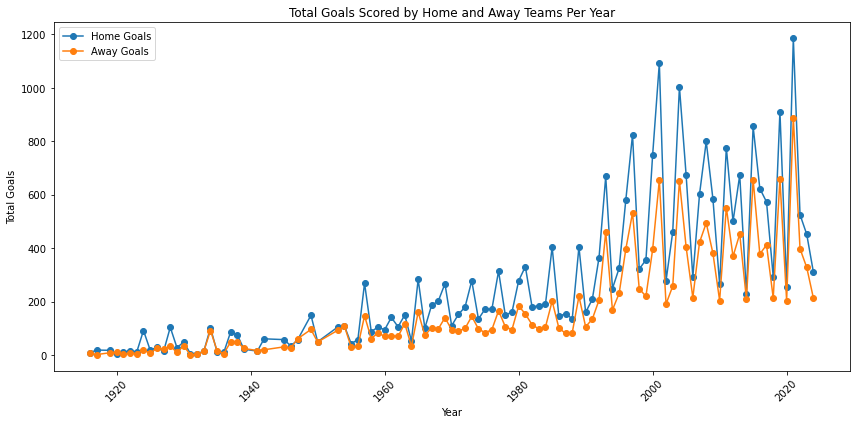

In [16]:
# Total goals scored by home vs away teams per year
query_goals_by_team_per_year = """
SELECT 
    YEAR(g.date) AS year,
    SUM(CASE WHEN g.team = r.home_team THEN 1 ELSE 0 END) AS home_goals,
    SUM(CASE WHEN g.team = r.away_team THEN 1 ELSE 0 END) AS away_goals
FROM 
    goalscorers g
JOIN 
    results r ON g.date = r.date
GROUP BY 
    year
ORDER BY 
    year;
"""

results_goals_by_team_per_year = spark.sql(query_goals_by_team_per_year)
results_goals_by_team_per_year_pd = results_goals_by_team_per_year.toPandas()

# Display
print(results_goals_by_team_per_year_pd)

# Visualise
plt.figure(figsize=(12, 6))
plt.plot(results_goals_by_team_per_year_pd['year'], results_goals_by_team_per_year_pd['home_goals'], marker='o', label='Home Goals')
plt.plot(results_goals_by_team_per_year_pd['year'], results_goals_by_team_per_year_pd['away_goals'], marker='o', label='Away Goals')
plt.title('Total Goals Scored by Home and Away Teams Per Year')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The comparison of home goals and away goals over the years shows a mixed trend, but overall, home teams tend to score more goals than away teams. For example, in 2021, home teams scored 1,185 goals, while away teams scored 888 goals. This pattern suggests that teams usually perform better at home, likely because they're more comfortable with the environment and have support from local fans. The data highlights this home-field advantage, and the bar chart makes it easy to see that home teams generally score more goals than away teams throughout the years.

### Query 5: Top 10 Teams With The Most Goals in Shootouts

+---------+-----------+
|     team|total_goals|
+---------+-----------+
|Argentina|         13|
|  Nigeria|          9|
|   Brazil|          9|
|  Germany|          7|
|  Uruguay|          7|
|   Mexico|          7|
| DR Congo|          5|
|  Croatia|          5|
|    Italy|          5|
|   Panama|          5|
+---------+-----------+



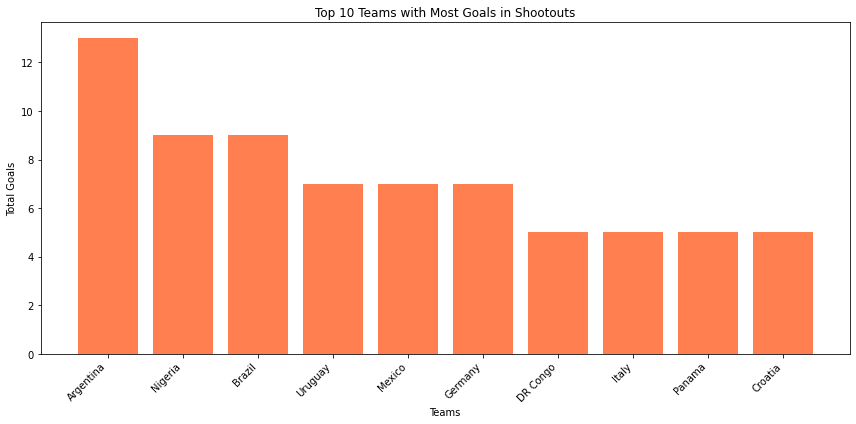

In [17]:
# Top 10 teams with the most goals in shootouts
shootout_goals_query = """
SELECT 
    s.winner AS team, 
    COUNT(*) AS total_goals
FROM 
    shootouts s
JOIN 
    goalscorers gs 
ON 
    s.date = gs.date 
WHERE 
    s.winner = gs.team
GROUP BY 
    s.winner
ORDER BY 
    total_goals DESC
LIMIT 10
"""

top_shootout_teams_df = spark.sql(shootout_goals_query)
top_shootout_teams_df.show()
top_shootout_teams_pd = top_shootout_teams_df.toPandas()

# Visualise
plt.figure(figsize=(12, 6))
plt.bar(top_shootout_teams_pd['team'], top_shootout_teams_pd['total_goals'], color='coral')
plt.title('Top 10 Teams with Most Goals in Shootouts')
plt.xlabel('Teams')
plt.ylabel('Total Goals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The list of teams with the most goals in shootouts shows Argentina at the top with 13 goals, followed by Nigeria and Brazil with 9 each, and Germany with 7. Knowing which teams are good at shootouts can really help when planning a game strategy. If a team has a strong shootout record, opponents might want to avoid letting the game go to penalties because that could put them at a disadvantage. On the other hand, teams that don't do well in shootouts might be easier to beat if it comes down to penalties. This info can be useful for teams in knockout tournaments.